In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.integrate import odeint

# Introduction

This coursework is worth 100% and is due Thursday, 6 January 2022, 16:00 (but
please always check what Canvas and Sussex Direct says!). Submission is electronic, via Canvas. Submission guidelines are identical to the formative coursework, namely: (a) Analytical work can be hand-written or typeset; (b) simulation code + analysis can be presented separately or integrated into a Jupyter / Colab notebook (whatever you prefer!).

In this coursework, you are going to engage in some proper modelling work. You are given a scenario along with a couple of ordinary differential equations that describe the operation of this system (in principle I could have asked you to derive them from the scenario description but I don’t). The questions take you through a number of steps by which you will gain a detailed understanding of the system / model. Although all questions are related, it is possible to get results even if you find yourself unable to complete some of the steps.

# Statement of problem

We consider a system of individuals (the nature of which is irrelevant) that can take two states A and B. At any point in time, an individual can only be in one state. There are no other states possible. We will denote by [A] the number of individuals in state A and by [B] the number of individuals in state B. There are N individuals in total. All individuals can be assumed to be in contact with all other individuals. At time t = 0, there are $B_0$ individuals in state B. All other individuals are therefore in state A. Individuals in state A turn into state B at a rate $ β*\frac{[B]}{N}$ , i.e., proportional to the number of their neighbours that are in state B. Individuals in state B turn into state A at a fixed rate γ.

Now, in an ideal world, you should be able to write the two ordinary differential equations (ODE) that describe this system. To make sure that everyone can proceed with the coursework, I am providing the ODEs in the last page of this document. Before consulting that section, you are strongly encouraged to try and come up with your own formulation.

$ [\dot{B}] = \beta\frac{[B]}{N}[A] - γ[B] $


$ [\dot{A}] = -\beta\frac{[B]}{N}[A] + γ[B] $
___
$ N = [A] + [B] $

## 1.1. 
Using the fact that [A] + [B] = N at all times, write $[\dot{B}]$ as a function of [B], i.e., the expression should no longer involve [A]. This is your (so-called) mean-field equation.
(2 marks)

We know that $[\dot{B}]$ is:

$[\dot{B}] = \beta\frac{[B]}{N}[A]-\gamma[B] $ 

And if we solve for $[A]$ being:

$ N = [A] + [B]  \to [A] = N - [B] $

Then we get the mean-field equation of $[\dot{B}]$ to be:

$ [\dot{B}] = \beta\frac{[B]}{N}(N-[B])-\gamma[B] $

This again can be simplified to be:

$ [\dot{B}] = \beta[B] - \frac{[B]^2}{N}-\gamma[B] $

$\to [B](\beta - \gamma) - \frac{\beta[B]^2}{N} $

## 1.2. 
Find the equilibria of the system and determine their stability. From now on,
we will refer to the non-zero equilibrium as B∗. You may find it useful to write
your results in terms of the following quantity $ R_0 = \frac{β}{γ} $. Plot the phase portrait, i.e., [B] vs [A], identifying the equilibria and their stability (following convention described in the 2nd synchronous lecture of Unit 5).
(8 marks)

First we need to find the fixed points of $[\dot{B}]$. We do that by setting $[\dot{B}] = 0$ i.e.:

$[\dot{B}] =  [B](\beta - \gamma) - \frac{\beta[B]^2}{N} = 0$\
$ 0 = [B](\beta - \gamma) - \frac{\beta[B]^2}{N}$

Then we split the equation by moving the fraction to the other side of the equal sign, getting:

$[B](\beta - \gamma) = \frac{β[B]^2}{N} $

when $[B] \ne 0$:\
$\to \beta - \gamma = \frac{β[B]}{N}$

Multiplying both sides by N gives:

$ N(\frac{\beta - \gamma}{\beta}) = [B]$

$\to N(1 - \frac{1}{R_0}) = [B]$ where $R_0 = \frac{\beta}{\gamma} $

This gives us the fixed points:

$0$ and $N(1 - \frac{1}{R_0})$

$N(1 - \frac{1}{R_0}) $ (which is represented by $B*$)

Finding the stability of the fixed points:

Taking the Jacobian of $ \frac{d(f[\dot{B}])}{d[B]}$ with fixed points above:\
$J = (\beta - \gamma) - \frac{2\beta[B]}{N}$\
when $[B] = 0$:\
$J(0) = \beta - \gamma$

From this we can say that: **If $\gamma > \beta$ then it is stable. If not, it is unstable.**

when $[B] = N(1 - \frac{1}{R_0})$:

$J(B*) = (\beta - \gamma) - \frac{2\beta N}{N} \times (1 - \frac{1}{R_0})$\
$\to \beta - \gamma - 2\beta \times \frac{(\beta - \gamma)}{\beta}$\
$\to \beta - \gamma - 2 \times (\beta - \gamma)$\
$\to \beta - \gamma - 2\times\beta + 2\gamma$\
$\to \gamma - \beta$

Meaning that: **If $\gamma > \beta$ then it is unstable. If else it is stable.**

Now to find the fixed points of $[A]$:\
We know that the fixed points for $[B]$ is $0$ and $ N(1 - \frac{1}{R_0})$, and that $[A] = N - [B]$

When $[A] = N$, then $[B] = 0 $

When $[B] = N(1 - \frac{1}{R_0})$, then:\
$[A] = N - (N - \frac{N}{R_0}) = N - N + \frac{N}{R_0} =\frac{N}{R_0}$

**So the fixed points of the system is:\
$(N, 0)$ and $(\frac{N}{R_0}, N(1 - \frac{1}{R_0}))$** 

(There is also another fixed point at (0, 0), but it is impossible to reach it unless we start off at that point)

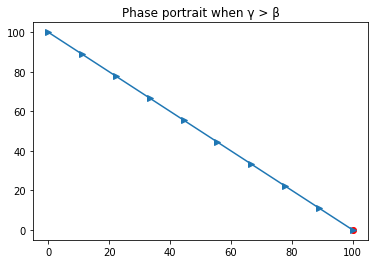

In [ ]:
# When gamma > beta
N = 100
B = np.linspace(0, 100, 10)
A = N - B
plt.plot(A, B, '->')
plt.scatter(N, 0, color='red')
plt.title('Phase portrait when γ > β')
plt.show()

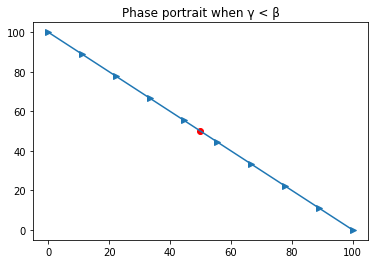

In [ ]:
# When gamma < beta
N = 100
B = np.linspace(0, 100, 10)
A = N - B
ro = 2 # When R_0 > 1
plt.plot(A, B, '->')
plt.scatter((N/ro), (N - N/ro), color='red')
plt.title('Phase portrait when γ < β')
plt.show()

The portrait should illustrate a conversion towards [(N/R_0), B*] (the red dot).

## 1.3.
Produce the bifurcation plot for this system, that is, plot the value of the equilibria as a function of $R_0$, with $R_0$ taking values from 0.1 to 5.0. For this question, the value of N is irrelevant (provided it’s strictly positive) so use 1000 for example. This should be done using Python.
(4 marks)

In [ ]:
def func(Ro, N):
    return N*(1 - 1/Ro)

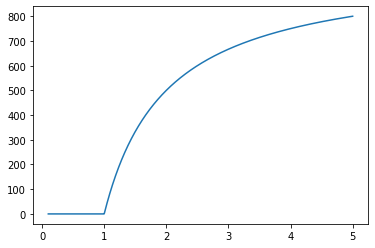

In [ ]:
def bifurcation_plot(x):
    y = []
    for i in x:
        if i < 1:
            y.append(0)
        else:
            y.append(func(i, 1000))
    plt.plot(x, y)

ro = np.linspace(0.1, 5, 1000)
bifurcation_plot(ro)

## 1.4.
In this question, you are going to integrate $[\dot{B}]$ analytically to obtain an expression for $[B](t)$, i.e., an expression that gives the number of individuals in state B in time. It is rarely the case that this can be done but with this system, it is possible. You will do this in four steps:

**NB:** In going through this question, do make sure to consider all scenarios possible regarding the value of $R_0$.

### 1.4.1.
Starting from the mean-field equation, factorise the right hand side by $[B]^2$,
then write an expression for $\frac{1}{[B]^2}[\dot{B}]$.
(4 marks)

Remember from Q1.1 that $[\dot{B}] = \beta\frac{[B]}{N}(N-[B])-\gamma[B] $ can be written as:

$[\dot{B}] =  [B](\beta - \gamma) - \frac{\beta[B]^2}{N}$

By factorising the equation with $ \frac{1}{[B]^2} $ we get:

$\frac{1}{[B]^2}[\dot{B}] =  \frac{(\beta - \gamma)}{[B]} - \frac{\beta}{N}$

### 1.4.2
Consider the following variable substitution: $y = \frac{1}{[B]}$. Using the chain rule,
express $\dot{y}$ in terms of [B], then derive a simple expression for $\dot{y}$, i.e., this expression should only involve y terms and parameters of the system. There shouldn’t be any [B] or [A]. However, it will be helpful to use B∗ (calculated in the 2nd question) to simplify the expression. (4 marks)

$ y = \frac{1}{[B]} $ (Bernoulli's ODE)

$ \dot{y} = -\frac{1}{[B]^2}[\dot{B}] $

Using the equation from step 1 (Q1.4.1):

$ - \dot{y} = y(\beta - \gamma) - \frac{\beta}{N}$

$\dot{y} = \frac{\beta}{N} - y(\beta - \gamma)$

$\dot{y} = \frac{\beta}{N} - y\frac{(N\beta - N\gamma)}{N} $

$\dot{y} = \frac{\beta}{N} - y\frac{\beta}{N}(N - \frac{N\gamma}{\beta}) $
___

$\dot{y} = \frac{\beta}{N} - \frac{\beta B*}{N}y$

### 1.4.3
Integrate this equation. You should be able to do this without any help, but
if help is needed, you should note that this expression looks very much like
the equation we solved during a synchronous lecture in Unit 4, replacing $\lambda$
and $I$ by appropriate quantities. You can then use the result to derive an
equation for y(t). Please see short document summarising the derivation
from the lecture. (4 marks)

let $\frac{\beta}{N} = I $ and $ \frac{\beta B*}{N} = \lambda$

then: $\dot{y} = -\lambda y + I$

If we assume that $y(t) = u(t)v(t)$

$\frac{dy}{dt} = u'(t)v(t) + u(t)v'(t)$

Since I is that means that $u'(t)$ is $-\lambda u$

$\frac{dy}{dt} = -\lambda u(t)v(t) + u(t)v'(t) $

$\frac{dy}{dt} = -\lambda u(t)v(t) + u(t)v'(t)$, $ [y = u(t)v(t)] $

According to the differential equation above: $I = u(t)v'(t)$\
$v'(t) = \frac{I}{u(t)}$

$u'(t) = -\lambda u$

Integrating $\frac{du}{-λu} \to \int\frac{du}{-λu} = \int dt$ we get:

$\frac{-1}{\lambda} log|u| + c = t$

at $t=0$ and $u=u_0$:

$\frac{-1}{\lambda} log|u| = t + \frac{-1}{\lambda} log|u_0|$

$\to log|u| = -\lambda t + log|u_0|$

$\to u = e^{-\lambda t}u_0$

Implementing this into $v'(t)$ we get:

$v'(t) = I\frac{e^{-λ t}}{u_0}$

Integrating this with t:

$v(t) = \frac{I}{u_0 \lambda} e^{-λt} + c$

This gives $y(t)$ the following expression:

$y(t) = u_0 e^{-\lambda t}(\frac{I e^{-λt}}{u_0λ} + c)$

$\to y(t) = \frac{I}{λ} +  c \times e^{-λt}$

Resubstituting I and λ gets us:

$y(t) = \frac{1}{B*}+ c \times e^{-\beta \frac{B* t}{N}}$

Resubbing $ y = \frac{1}{[B]}$:

$ \frac{1}{[B]} = \frac{1}{B*}+ c \times e^{-\beta \frac{B* t}{N}}$

$ \to [B] = \frac{B*}{1 + B* \times c \times e^{-\beta \frac{B* t}{N}}}$

### 1.4.4
You can now produce a fully worked out expression for $ [B](t) $ by remembering
that $ [B] = B_0 $ at time $ t = 0 $. (4 marks)

Remember that $B* = N(1 - \frac{1}{R_0})$

$B_0 = \frac{B*}{1 + B* C}$

$1 + B*C = \frac{B*}{B_0}$

$C = \frac{(\frac{B*}{B_0}-1)}{B*}$

Resubstituting C into(v) gives us the following expression for $[B](t)$:

$[B](t) = \frac{B*}{1 + B* \times \frac{1}{B*}(\frac{B*}{B_0} - 1) e^{-(\beta-\gamma)t}}$

Which can be simplified as:

$[B](t) = \frac{B*}{1 + (\frac{B*}{B_0} - 1) e^{-(\beta-\gamma)t}}$

## 1.5.
Using different values of $B_0$ (between 1 and N – briefly discuss the case $B_0 = 0$), plot solutions of $[B](t)$ for various values of $R_0$ between 0.1 and 5.0 (with γ = 0.5 for example). Confirm your expression for $[B](t)$ is correct by (a) verifying that it converges to B∗ for large times t and (b) visually confirming agreement when integrating the mean-field equation using Euler (use Python). What happens when $R_0 = 1$? Speculate as to what this means. We will get back to this. For a given value of $R_0$, what happens when the value of γ changes? Provide a brief explanation.
(11 marks)

From Q1.4 we get the following expression for $[B](t)$:

$[B](t) = \frac{B*}{1 + (\frac{B*}{B_0} - 1) e^{-(\beta-\gamma)t}}$

where $B* = N - \frac{N}{R_0}$

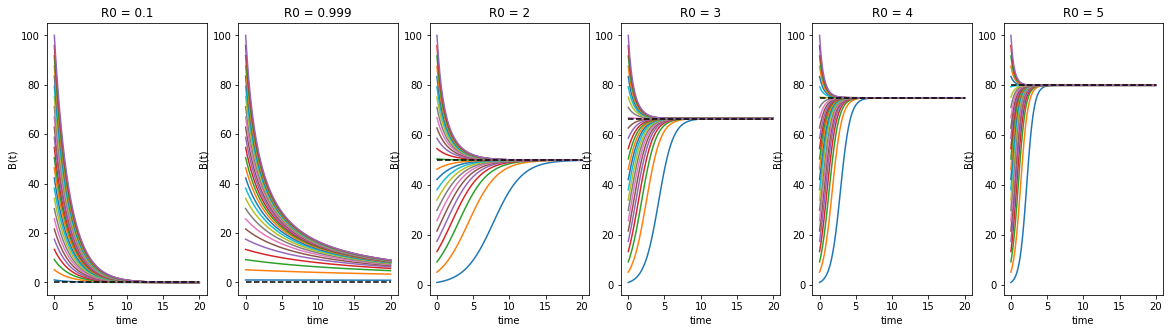

In [ ]:
# [B] of t with multiple R_0 values
def B_t(R0, gamma, N, B0, t):
    b_star = N * (1 - 1/R0)
    return (b_star/(1 + (b_star/B0 - 1)* np.exp(-((R0*gamma) - gamma) * t)))

time = np.linspace(0, 20, 100)
R0s = [0.1, 0.999, 2, 3, 4, 5]
gamma = 0.5
N = 100
B0s = np.linspace(1, 100, 25)


fig, axes = plt.subplots(1, 6, figsize=(20, 5))
for n, R0 in enumerate(R0s):
    b_star = N * (1 - 1 / R0)
    for B0 in B0s:
        axes[n].plot(time, B_t(R0, gamma, N, B0, time))
    axes[n].plot(time, max(0, b_star)*np.ones_like(time), linestyle="dashed", c="black")
    axes[n].set_title(f"R0 = {R0}")
    axes[n].set_xlabel("time")
    axes[n].set_ylabel("B(t)")

plt.show()

**Integrating $[B](t)$ using Eulers**

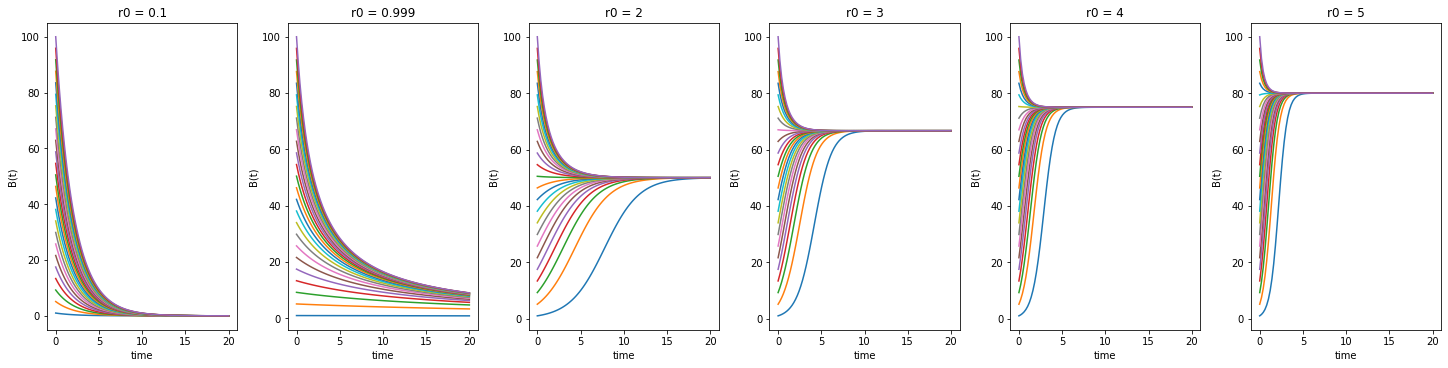

In [ ]:
def system(B, t, beta, gamma, N): 
    return B*(beta-gamma) - ((B**2)*beta/N)

fig, axes = plt.subplots(1, 6, figsize = (20, 5), constrained_layout=True)
for i, r0 in enumerate(R0s):
    for b0 in B0s:
        axes[i].plot(time, odeint(system, b0, time, args = (r0*0.5, 0.5, 100)))
        axes[i].set_title(f'r0 = {r0}') 
        axes[i].set_xlabel("time")
        axes[i].set_ylabel('B(t)')
plt.show()

The graphs above shows that **(a)** it converges to $B*$ for large times t, and **(b)** is visually the same when using Euler integration for the mean-field equation.

**When $R_0 = 1$:**\
When $R_0 = 1$, $[B](t) = \frac{0}{0}$ thus, it is an intermediate value and $[B](t)$ can be written as:
$$ \lim_{R_0\to1} \frac{N - \frac{N}{R_0}}{1 + (\frac{(N - \frac{N}{R_0})}{B_{0}}-1)e^{-(\beta-\gamma)t}} $$

Because the above equation is of an intermediate form, we can use L'Hôpital's rule to find the limit at $R_0$ = 1.

L'Hôpital's rule: $$ \lim_{x\to a} \frac{f(x)}{g(x)} = \lim_{x\to a} \frac{f'(x)}{g'(x)}$$

* After differentiating the numerator and denominator we get:

$$ \lim_{R_0\to1} \frac{\frac{N}{R_0^{2}}}{\frac{Ne^-{\gamma t (R_0-1)}}{B_0 R_0^{2}} - \gamma t (\frac{-N}{B_0 R_0} + \frac{N}{B_0} - 1)e^-\gamma t (R_0 - 1)} $$


* Applying the limits (at $R_0 = 1$):

$$ \frac{N}{\frac{N}{B_0} + \gamma t} $$

So the equation above denotes the behaviour of the system at $R_0 = 1$.

When $R_0 = 1$, the equation is independent of $\beta$ and is only depended on $\gamma$.
At this point, theoretically, convergence will only take place at infinite time thus, small changes in the dependent variables will result in smaller variations.

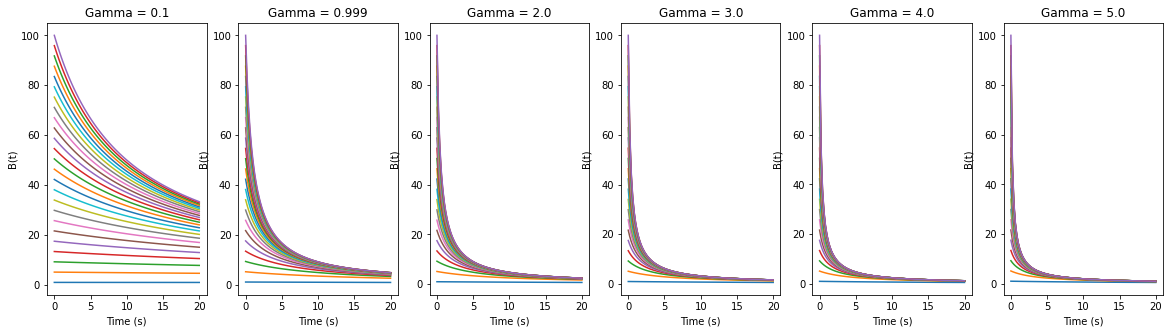

In [ ]:
def B_t(R0, gamma, N, B0, t):
    if R0 == 1.0:
        return B0/(1+(B0*gamma*t/N)) # Remember that when R_0 = 1, 
    else:
        b_star = N*(1-(1/R0))
        return (b_star/(1+((b_star/B0)-1)*np.exp(-1*((R0*gamma)-gamma)*t)))

gammas = np.array([0.1, 0.999, 2, 3, 4, 5])
B0s = np.linspace(1, 100, 25)

fig, axes = plt.subplots(1, len(gammas), figsize=(20, 5))
for i, gamma in enumerate(gammas):
    for b0 in B0s:
        time = np.linspace(0, 20, 100)
        axes[i].plot(time, [B_t(1, gamma, 100, b0, i) for i in time])
        axes[i].set_title(f'Gamma = {gamma}') 
        axes[i].set_xlabel("Time (s)")
        axes[i].set_ylabel('B(t)')
plt.show()

From the above graphs, the following is observed:
1. As the value of gamma reaches 0, it takes a very large amount of time for convergence (nearly infinity for Infinitesimal gamma values).
2. As the value of gamma increases, it takes lesser time for convergence.

For a given $R_0$, the following is obeserved for variation in $\gamma$:
1. If $\gamma > \beta$: the trajectories converge to $B^*$.
2. If $\gamma < \beta$: the trajectories convere to 0.
3. If $\gamma = \beta$: the trajectories converge the 0 but the overall behaviour is governed by $\gamma$ i.e. the larger the gamma, the faster the convergence and, the smaller the gamma, the slower the convergence.

# Simulation work

Some more could be done analytically but let’s now turn to simulations. For this
part of the work, we will employ the Gillespie algorithm, an algorithm often used to simulate complex systems. There is something very important to understand here. The mean-field equation provided to you is derived from considering the interactions of a very large number of individuals. The Gillespie algorithm, instead, provides discrete simulations of the system with few individuals by explicitly simulating every transitions. In other words, a single run of the Gillespie algorithm represents one sample trajectory of all possible trajectories for this system. In principle, the average of a (sufficiently) large number of Gillespie runs should converge to the mean-field.
This is what you will test here. NB: Gillespie provides a mathematically rigorous and computationally efficient alternative to agent-based modelling. You are not asked to compare the two approaches even if that would be an interesting thing to do (NB: but certainly not within this assessment!).
To make sure everybody can work, I provide a Python implementation of the Gillespie algorithm for this problem. Use the code although feel free to write your own if you feel so inclined – you would need to read up on the Gillespie algorithm obviously. 
Function gillespie_ABA takes 5 arguments: $N$, $B_0$, $β$, $γ$ and $Tmax$ (max simulation time) and produces three outputs: $T$, $A$ and $B$ which contain the time of each transition (when one, and only one, individual changed state, whatever that state was), the numbers of individuals in state A and in state B after that transition, respectively. NB: The Gillespie algorithm uses exponentially-distributed times to next event so each run will have a different timeline T of events. This won’t be apparent to you if plotting with lines but will matter in what comes below.



In [ ]:
# 28 November 2021 v1.3
# Luc Berthouze
from random import expovariate # Generate variates from exponential distribution
import numpy as np

def gillespie_ABA(N,B0,beta,gamma,Tmax):

    A = [N - B0] # We cannot predict how many elements there will be unfortunately
    B = [B0]
    T = [0] 
    state = np.random.permutation([0] * (N-B0) + [1] * B0) # Randomly allocate B0 individuals to have state B (state=1), A (state=0) otherwise 
    B_contacts = np.where(state == 1)[0] # Index of individuals in state B (state=1).
    rate_vector = B0 * beta * np.ones((N, 1)) / N # Set rates to be B0*beta/N (rate for individuals in state A) to all individuals (initialisation). 
    rate_vector[B_contacts] = gamma # Update rate of B_contacts to be gamma (the rate for individuals in state B)
    
    time = 0
    while time <= Tmax + 0.5: # some (arbitrary) buffer after Tmax
        rate = np.sum(rate_vector) # Total rate (refer to Gillespie algorithm for details)
        cumrate = np.cumsum(rate_vector) # Cumulated sum of rates
        if rate > 0.000001: # if rate is sufficiently large
            tstep = expovariate(rate) # Pick an exponentially distributed time. Beware of difference with exprnd in Matlab where it is 1/rate
            T.append(T[-1] + tstep) # Time of next event
            event = np.where(cumrate > np.random.rand()*rate)[0][0] # Find which individual will see its state change 
            if state[event] == 0: # individual is in state A 
                A.append(A[-1] - 1) # this state A individual becomes state B so number of state A individuals is decreased
                B.append(B[-1] + 1) # obviously, number of state B individuals is increased 
                state[event] = 1 # Update state vector
                rate_vector[event] = gamma # Change rate of individual to B->A rate, namely gamma
                A_contacts = np.where(state == 0)[0] # List of state A individuals after change
                rate_vector[A_contacts] += beta / N # Update rate of state A individuals to account for the extra state B individual
            else: # individual is in state B
                B.append(B[-1] - 1) # this state B individual becomes state A so number of state B individuals is decreased
                A.append(A[-1] + 1) # obviously, number of state A individuals is increased
                state[event] = 0 # Update state vector
                A_contacts = np.where(state == 0)[0] # List of state A individuals after changes                                
                rate_vector[A_contacts] = beta * len(np.where(state == 1)[0]) / N # Update rate of state A individuals based on number of B individuals  
        else: # Nothing will happen from now on so we can accelerate the process
            time = T[-1] # current time
            while time <= Tmax + 0.5:
                A.append(A[-1]) # Just keep things as they are
                B.append(B[-1])
                T.append(T[-1] + 0.5) # arbitrarily add 0.5 to clock
                time = T[-1]
        # Update time and proceed with loop 
        time = T[-1]         

    return T,A,B

## 2.1.
Explore the behaviour of the system when considering suitably chosen scenarios,
i.e., focus on the limit cases (e.g., small $R_0$, large $R_0$ and $R_0$ = 1; small N, large N; small $B_0$, large $B_0$). For each scenario, use the code provided to generate many realisations of the stochastic process. Plot all realisations on a single plot. Make relevant qualitative observations. (10 marks)

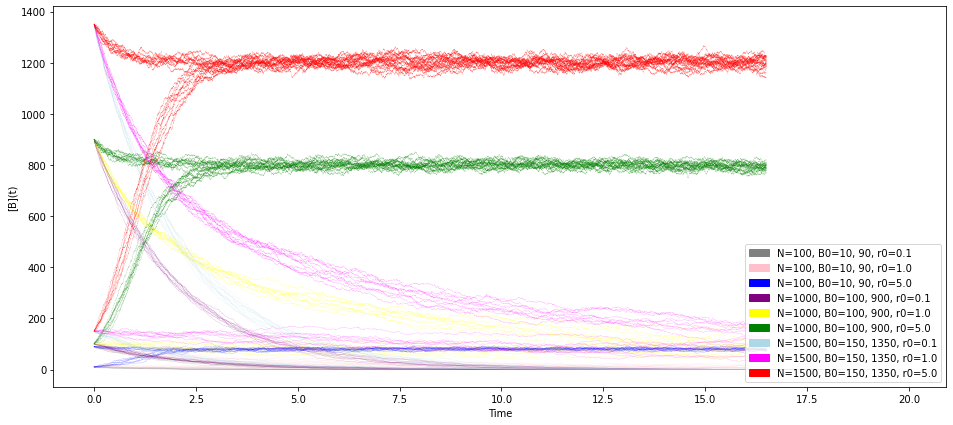

In [ ]:
R0s = np.array([0.1, 1, 5])
num = [100, 1000, 1500]
fig, ax = plt.subplots(figsize = (16, 7))
patches = []
colors = ['gray', 'pink', 'blue', 
           'purple', 'yellow', 'green', 
           'lightblue', 'magenta', 'red']
c_count = 0
for N in num:
    B0s = [int(N * 0.1), int(N * 0.9)]
    for r0 in R0s:
        for b0 in B0s:
            for i in range(10):
                T, A, B = gillespie_ABA(N, b0, r0*0.5, 0.5, 16)
                ax.plot(T, B, c = colors[c_count], linewidth=0.2, alpha=0.5)
        patches.append(Patch(color=colors[c_count], 
                             label=f'N={N}, B0={B0s[0]}, {B0s[1]}, r0={r0}'))
        c_count += 1
ax.legend(handles=patches, loc="best")
ax.set(xlabel="Time", ylabel="[B](t)")
plt.show()

The following was observed:
1. When $R_0 > 1$, the graph converges to $B^{*}$.
2. When $R_0 \leq 1$, the plot converges to 0.
3. Variations in $B_0$ only changes the starting position of the number of individuals in state [B]. Convergence is based on $R_0$
4. When considering a smaller $t_{max}$ value for $R_0 = 1$, trajectories obtained either converge to $B^{*}$ in some cases and $0$ in the other.
5. For small values of $N$, there is a much higher variance observed than those cases of large $N$.
6. For values close to or equal to $R_0$ = 1, it takes a very large amount of time for convergence in comparision to other $R_0 > 0$ and $R_0 < 0$.
7. The time taken for convergence is governed by the $R_0$.

## 2.2.
For each scenario, calculate the average (and standard deviation) of the realisations.
Here, you are going to face a problem linked with the nota bene from
the introductory paragraph. You will need to think of a solution and implement
it. Superimpose the average (and error bars) to the realisations. Use a larger
line width for visibility.
(11 marks)

In order to obtain the average of each of the realisations we must obtain trajectories for each set of cases of a binned range. The range for each case is defined by the largest time value ($T_{max}$) with respect to that case of realisations. From 0 to $T_{max}$, arbitary number of intervals are taken where each of the values lying in that interval are sampled. Each of the samples obtained in their respective time intervals is then averaged and its respective standard deviation is obtained.
To plot the error bars, we'll use the standard deviation.

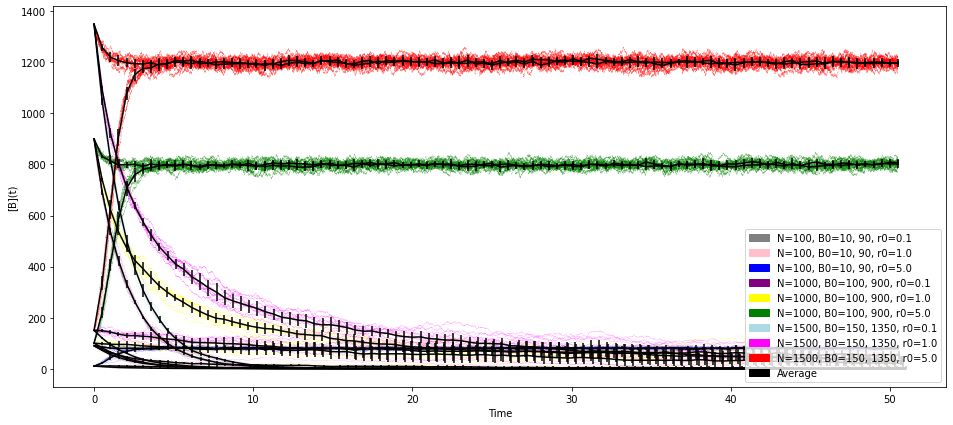

In [ ]:
R0s = np.array([0.1, 1, 5])
num = [100, 1000, 1500]
fig, ax = plt.subplots(figsize = (16, 7))
patches = []
colors = ['gray', 'pink', 'blue', 
           'purple', 'yellow', 'green', 
           'lightblue', 'magenta', 'red']
count = 0
for N in num:
    B0s = [int(N * 0.1), int(N * 0.9)]
    for r0 in R0s:
        for b0 in B0s:
            B_temp = []
            T_temp = []
            for _ in range(10):
                T, A, B = gillespie_ABA(N, b0, r0*0.5, 0.5, 50)
                ax.plot(T, B, c = colors[count], zorder=-32, linewidth=0.2, alpha=0.5)
                B_temp.append(B)
                T_temp.append(T)
            y = []
            err = []
            t_average = np.linspace(0, np.amax([j for i in T_temp for j in i]), 100)
            for i in range(len(t_average)):
                B_sum = 0
                t_count = 0
                Tmax = t_average[i]
                vals = []
                for j in range(len(T_temp)-1):
                    for k in range(len(T_temp[j])-1):
                        if T_temp[j][k] <= Tmax and T_temp[j][k+1] > Tmax:
                            t_count += 1
                            B_sum += B_temp[j][k]
                            vals.append(B_temp[j][k])
                if t_count == 0:
                    y.append(y[i-1])
                    err.append(err[i-1])
                else:
                    err.append(np.std(vals))
                    y.append(np.mean(vals))
            ax.errorbar(t_average, y, err, color='black', ecolor='black')
        patches.append(Patch(color=colors[count], 
                                      label=f'N={N}, B0={B0s[0]}, {B0s[1]}, r0={r0}'))
        count += 1
patches.append(Patch(color='black', label=f"Average"))
ax.legend(handles=patches, loc="best")
ax.set(xlabel ="Time", ylabel='[B](t)')
plt.show()

## 2.3.
Finally, superimpose the mean-field solution. Again, use a larger line width and
different colour for visibility. Describe and interpret agreement between average
of stochastic realisations and mean-field in relation to the choice of parameters.
In this question, using $B_0 = 1$ (i.e., only one individual in state B at t = 0) can
help exacerbate the differences and help you think about what is happening.
You may want to refer to your bifurcation plot.
(8 marks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


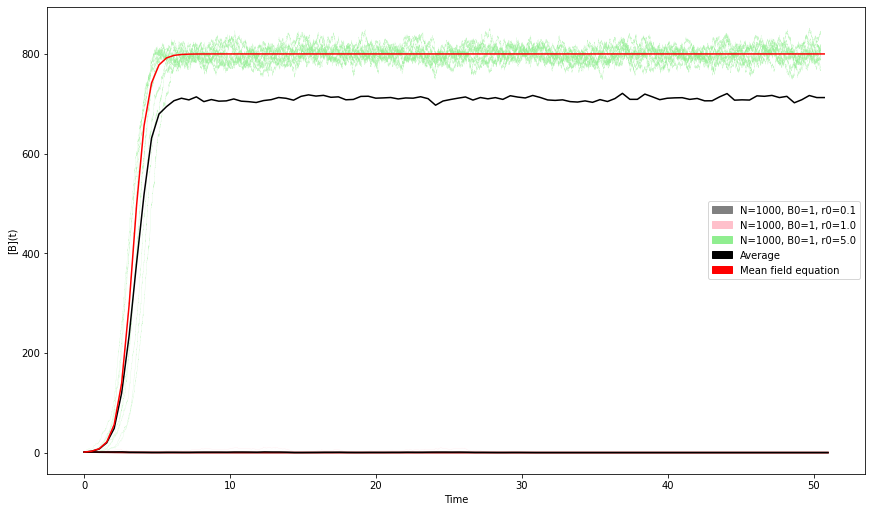

In [ ]:
def B_t(R0, gamma, N, B0, t):
    b_star = N*(1-(1/R0))
    return (b_star/(1+((b_star/B0)-1)*np.exp(-1*(R0*gamma-gamma)*t)))


R0s = np.array([0.1, 1, 5])
num = [1000]
fig, ax = plt.subplots(figsize=(12, 7))
patches = []
colors = ['gray', 'pink', 'lightgreen', 
           'purple', 'yellow', 'green', 
           'lightblue', 'magenta', 'red']

count = 0
for N in num:
    B0 = [1]
    for r0 in R0s:
        for b0 in B0:
            B_temp = []
            T_temp = []
            for _ in range(10):
                T, A, B = gillespie_ABA(N, b0, r0*0.5, 0.5, 50)
                ax.plot(T, B, c = colors[count], zorder=-32, linewidth=0.2, alpha=0.5)
                B_temp.append(B)
                T_temp.append(T)
            y = []
            t_average = np.linspace(0, np.amax([j for i in T_temp for j in i]), 100)
            for i in range(len(t_average)):
                B_sum = 0
                t_count = 0
                Tmax = t_average[i]
                vals = []
                for j in range(len(T_temp)-1):
                    for k in range(len(T_temp[j])-1):
                        if T_temp[j][k] <= Tmax and T_temp[j][k+1] > Tmax:
                            t_count += 1
                            B_sum += B_temp[j][k]
                            vals.append(B_temp[j][k])
                if t_count == 0:
                    y.append(y[i-1])
                    err.append(err[i-1])
                else:
                    y.append(np.mean(vals))
            ax.plot(t_average, y, color='black')
            ax.plot(t_average, [B_t(r0, 0.5, N, b0, timestamp_avg) for timestamp_avg in t_average],
                    c='red')
        patches.append(Patch(color=colors[count],
                             label=f'N={N}, B0={B0[0]}, r0={r0}'))
        count += 1
patches.append(Patch(color='black', label=f'Average'))
patches.append(Patch(color='red', label=f"Mean field equation"))
ax.legend(handles=patches, loc="best")
ax.set(xlabel='Time', ylabel='[B](t)')
plt.show()

From the above graph, the following can be interpreted:
1. The mean field equation values pass through the centre of the trajectories while the average of the trajectories is deviated from its true average.
2. Due to stochastic nature of Gillespie's algorithm, few of the trajectories which are supposed to converge at $B*$, end up converging to 0 thus, indicating a leakage in [B] when a small $B_0$ is taken.
3. According to the bifurcation diagram, when $R_0 \leq 0$, the trajectories converge to 0 and when $R_0 > 0$, the trajectories converge to $B_{*}$. This has been confirmed through the stochastic simulations but in some cases, when the starting value ($B_0$) is small in comparision to the total population, a significant amount of trajectories converge to 0 instead of $B*$ which is undesirable.
4. In case of $R_0 > 1$ and $B_0 = 1$, the average of the trajectories are much lesser than the mean field equation indicating towards a leakage in the [B].

Below you will find the subplots again.

## 2.4. 
[Slightly challenging question]: Consider 100 replications for N = 1000, β =
0.51, γ = 0.5 and 100 replications for N = 1000, β = 0.95, γ = 0.5. You should
notice a substantial difference in agreement between the mean-field and the average
of the stochastic realisations depending on which scenario is considered.
How could you improve agreement for the scenario with the poorest agreement.
Please note: The difference in B∗ is not the quantity of interest here. Rather
you should think about why agreement is so poor. This does not actually involve
analytical work. An excellent answer would see you implement your proposed
solution and provide evidence of improved agreement.
(12 marks)

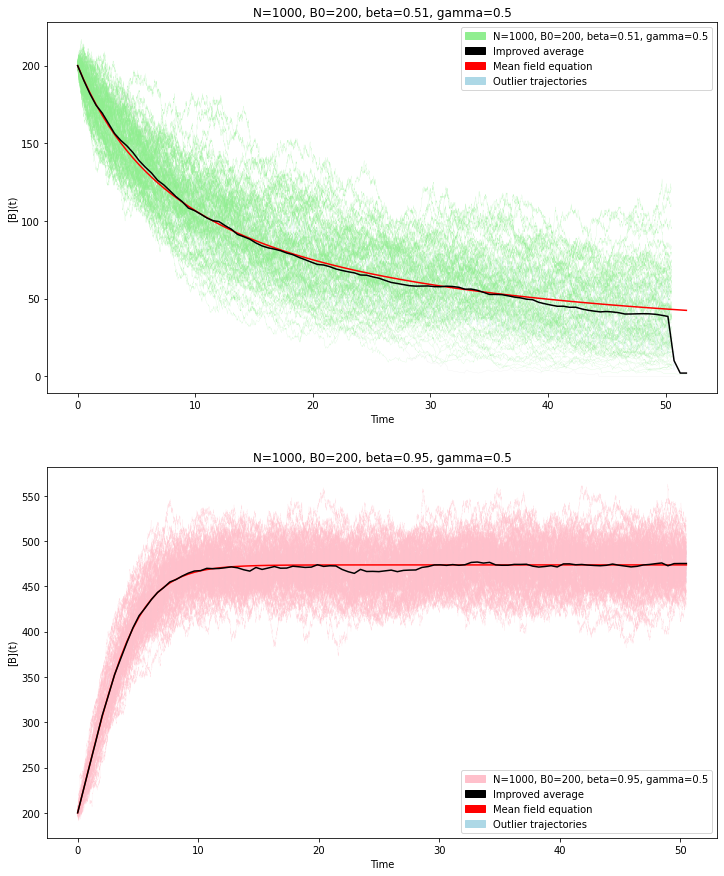

In [ ]:
def B_t(beta, gamma, N, B0, t):
    b_star = N*(1-(gamma/beta))
    return (b_star/(1+((b_star/B0)-1)*np.exp(-1*(beta-gamma)*t)))

colors = ['lightgreen', 'pink']
params = [(1000, 200, 0.51, 0.50, 50), (1000, 200, 0.95, 0.50, 50)]
fig, ax = plt.subplots(len(colors), 1, figsize=(12, 15))

for color_count, (N, b0, beta, gamma, tmax) in enumerate(params):
    patches = []
    T_vals = []
    B_vals = [] 
    for i in range(100): # 100 iterations
        while True:
            T, A, B = gillespie_ABA(N, b0, beta, gamma, tmax)
            if B[-1] > 0:
                B_vals.append(B)
                T_vals.append(T)
                ax[color_count].plot(T, B, c=colors[color_count], linewidth=0.2, alpha=0.5)
                break
            else:
                ax[color_count].plot(T, B, c='lightgray', linewidth=0.2, alpha=0.5)

    y = []
    err = []
    t_average = np.linspace(0, np.amax([j for i in T_vals for j in i]), 100)

    for i in range(len(t_average)):
        B_sum = 0
        t_count = 0
        Tmax = t_average[i]
        vals = []
        for j in range(len(T_vals)-1):
            for k in range(len(T_vals[j])-1):
                if T_vals[j][k] <= Tmax and T_vals[j][k+1] > Tmax:
                    t_count += 1
                    B_sum += B_vals[j][k]
                    vals.append(B_vals[j][k])
        if t_count == 0:
            y.append(y[i-1])
            err.append(err[i-1])
        else:
            err.append(np.std(vals))
            y.append(np.mean(vals))
            
    ax[color_count].errorbar(t_average, y, err, color='black', ecolor='aliceblue')
    ax[color_count].plot(t_average, [B_t(beta, gamma, N, b0, t) for t in t_average], c='red')
    patches.append(Patch(color=colors[color_count], 
                                  label=f"N={N}, B0={b0}, beta={beta}, gamma={gamma}"))
    patches.append(Patch(color='black', label=f"Improved average"))
    patches.append(Patch(color='red', label=f"Mean field equation"))
    patches.append(Patch(color='lightblue', label=f"Outlier trajectories"))
    ax[color_count].legend(handles=patches, loc="best")
    ax[color_count].set(xlabel='Time', ylabel="[B](t)")
    ax[color_count].set_title(f"N={N}, B0={b0}, beta={beta}, gamma={gamma}") 
plt.show()

As shown in the earlier questions, when $R_0 > 1$ there is a large variance in the mean field equation. The large variance occurs due to presence of outliers in the simulations. The above graphs show the presence of outliers and the corrected average of the realisations. 


**For $N = 1000, B_0 = 1, \beta = 0.51, \gamma = 0.5 $ and $t_{max} = 50$:**\
Since $\beta > \gamma$ (i.e. $R_0 > 1$), the trajectories should ideally converge to $B^{*}$\
For this case, the average of the realisations was improved by removing the outliers and varying the value of $B_0$ (initially $B_0 = 200$).\
In this case, since $B_0 = 200$, the curve is moving slightly up as $B^* \approx 19.6$.\
Trajectories produced for this case had a very high variation thus, a upper bound to the convergence of trajectories was taken as well.\
$R_0 = 1.02$, which is near unity, the trajectories take much longer to converge than the other case.


**For $N = 1000, B_0 = 1, \beta = 0.95, \gamma = 0.5 $ and $t_{max} = 50$:**\
Since $\beta > \gamma$ (i.e. $R_0 > 1$), the trajectories should ideally converge to $B^{*}$.\
For this case too, the average of the realisations was improved by removing the outliers and varying the value of $B_0$ (initially $B_0 = 200$).\
In this case, since $B_0 = 200$, the curve is moving up as $B^* \approx 474$.\
As $R_0 = 1.9$, the curve converges much quicker compared to the other scenario.


# A bit of critical thinking
In this last part of the coursework, you are invited to think a bit more about what you
have just done.

## 3.1. 
So far the brief has provided no information whatsoever regarding what the
states A and B are and what the individuals are. Thinking about what is happening
in this system, provide at least one example of real-world scenario to
which this model could apply. Bonus points will be given for any answer that
provides two examples, one in which the equilibria are of interest and the other
in which the critical regime (when $R_0$ = 1) is of interest. Either way, what is the
benefit of being able to model the system?
(8 marks)

The system created could be considered as an example of an epidemic model (e.g. COVID-19) where [A] is number of people uninfected, yet susceptible, and [B] is number of infected people in population N. Every individual in this system is able to become infected by the disease, and (in this system) has no form of immunity. Meaning that individuals are capable of being infected infinitely many times.

When an individual goes **from state [A] to [B]**, they do so at rate $\beta[A][B]$. And **from [B] to [A]** at rate $\gamma[A]$. $\gamma$ is in this case the recovery rate and $\beta$ is the infection rate.

## 3.2. 
[Very tough question]: The model provided implicitly assumes that all individuals
are potentially in contact with each other. What would be a more likely
scenario? What changes would have to be made to the code of the Gillespie
algorithm in order to include such a scenario? If you are able to do this, do
it. Then, speculate as to what could affect the results observed in the previous
questions. If you feel so inclined, demonstrate it experimentally. NB: Only 10
marks have been given to this question. However, anyone managing it successfully
would receive an extra 10 marks for the assignment (with the total
mark capped to 100 obviously).
(10 marks)